In [1]:
import os

os.chdir('/Users/jerryinyang/Code/quantbt')

In [10]:
import pickle
import yfinance as yf # noqa
import pandas as pd
import os # noqa
from models.pip_miner import PipMiner # noqa

from alpha import BaseAlpha, EmaCrossover # noqa
from backtester import Backtester
from strategies import PipMinerStrategy, PipMinerAlpha # noqa
from reporters import AutoReporter  # noqa: F401

%matplotlib inline

In [11]:
with open('/Users/jerryinyang/Code/quantbt/research/miner.pkl', 'rb') as f:
    miner =  pickle.load(f)

In [12]:
start_date = '2018-01-01'
end_date = '2018-10-01'

In [13]:
# Create DataHandler
backtester = Backtester(start_date=start_date, end_date=end_date, max_exposure=.02)

# Add Alpha
backtester.add_alpha(PipMinerAlpha, miner=miner)
# backtester.add_alpha(BaseAlpha, name='base_alpha', profit_perc=.1, loss_perc=.05)

# Add Data
ticker, df = 'BTCUSDT', pd.read_csv('/Users/jerryinyang/Code/quantbt/data/prices/BTCUSDT.csv')
backtester.add_data(ticker=ticker, dataframe=df, date_column_index=0)

# ticker, df = 'BTCUSDT', pd.read_parquet('/Users/jerryinyang/Code/quantbt/data/prices/BTCUSDT.parquet')
# backtester.add_data(ticker=ticker, dataframe=df)

In [14]:
trades = backtester.backtest()

Initiating Backtest
Backtest Complete. NET RETURN : 309.53630267237895


In [15]:
# Use Reporter
reporter = AutoReporter('full', 'full')
reporter.compute_report(backtester)
x = reporter.compute_earnings()

# # Pickle the instance
# with open('reporter.pkl', 'wb') as file:
#     pickle.dump(reporter, file)

In [16]:
x.to_csv('xxxxx.csv')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


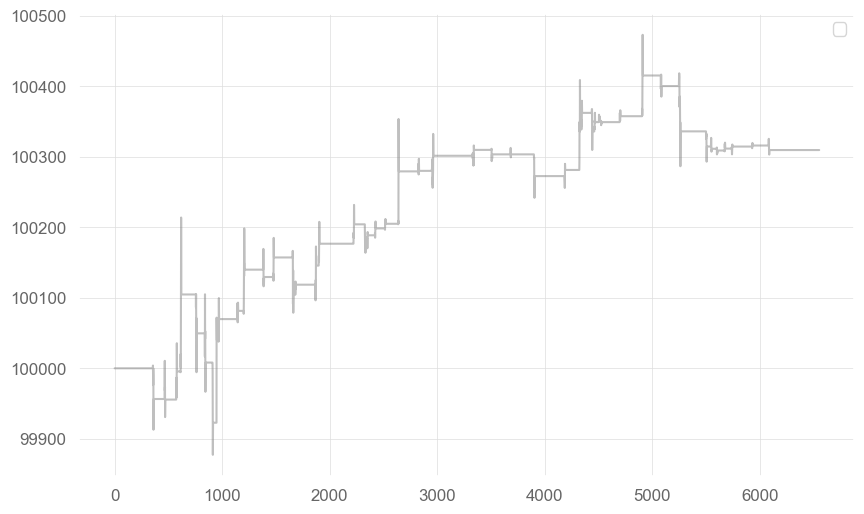

In [17]:
reporter.compute_earnings()
reporter.plot_equity_curves()

In [18]:
reporter.metrics

,id,net_profit,gross_profit,gross_loss,average_pnl,average_profit,average_loss,largest_profit,largest_loss,net_profit_percent,...,average_duration_losing,max_consecutive_wins,max_consecutive_losses,sharpe_ratio,cagr,sortino,kurtosis,skew,adjusted_sortino,risk_return_ratio
0,baee9d80-f2c8-42aa-a562-9872e4b4c672,309.536303,707.910827,-398.374525,6.317067,24.410718,-20.96708,109.120664,-55.130192,0.309311,...,0 days 00:00:00.000021600,5,6,0.093046,0.002857,0.142259,193.551067,3.804045,0.100593,0.007849
